In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1. Complete estimate function

In [2]:
def estimate(x, y, x0, h):    
    m = x.shape[0]
    # since there's only one parameter theta, add a cloumn of ones in X to add the bias term
    X = np.append(x, np.ones(m).reshape(m,1), axis=1) 
  
    # Initialising w as an identity matrix for storing weight as a diagnal matrix
    w = np.mat(np.eye(m)) 
    for i in range(m): 
        xi = X[i] 
        # using Guassion kernel formula to calculate weight
        w[i, i] = np.exp(np.dot((xi-x0), (xi-x0).T)/(-2 * h * h))  
        
    theta = np.linalg.pinv(X.T*(w * X))*(X.T*(w * y))
    # adding column of ones as well to the point x0 that we want to predict
    x0 = np.array([x0, 1])
    yhat = np.dot(x0, theta) 
    return yhat

def main(x, y, h): 
    m = x.shape[0]
    xhat = np.linspace(0, 1, m) 
    yhat = [estimate(x, y, x0, h) for x0 in xhat] 
    # reshaping xhat and yhat to match x and y shape
    xhat = np.array(xhat).reshape(m,1)
    yhat = np.array(yhat).reshape(m,1)
    residuals = y - yhat
    SSE = np.sum(residuals**2)
    return xhat, yhat, SSE

# 2. Generate 30 samples and apply estimate function with different h

SSE 16.889889085563116


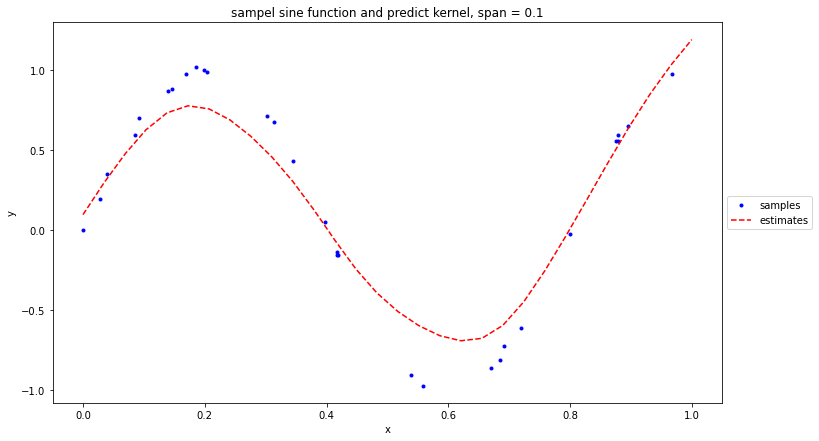

In [3]:
np.random.seed(1)
m=30
x = np.random.uniform(size=(m,1))
epsilon = 0.03 * np.random.normal(size=(m,1))
y = np.sin(x * 2.5 * np.pi) + epsilon 


# plot example of span selecting
span = 0.1
xhat, yhat, SSE = main(x, y, span)
print('SSE',SSE)
plt.figure(figsize=(12,7))
plt.plot(x, y, 'b.', label='samples')
plt.plot(xhat, yhat, 'r--', label='estimates') # Predictions in red color.
plt.title(f'sampel sine function and predict kernel, span = {span}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

When I used h=0.1 to apply the estimate function. The yhat output on the plot looks fit very well to the y. This might be overfitting, so I'll choose a higher h and see how it'll perform.

SSE 13.699786508962502


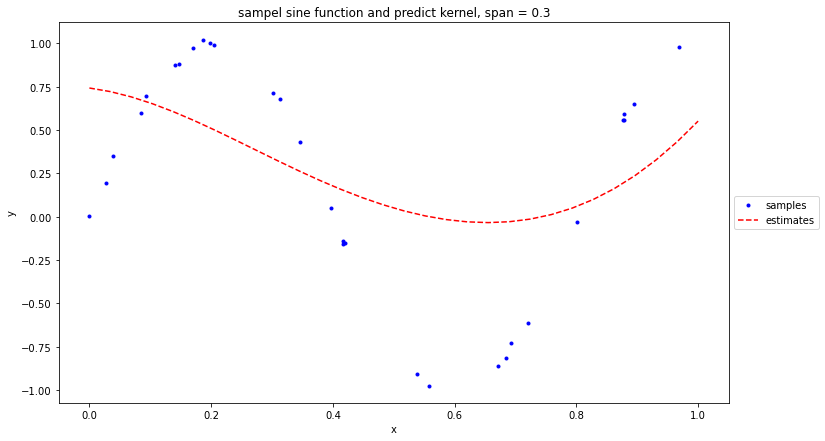

In [4]:
# plot example of span selecting
span = 0.3
xhat, yhat, SSE = main(x, y, span)
print('SSE',SSE)
plt.figure(figsize=(12,7))
plt.plot(x, y, 'b.', label='samples')
plt.plot(xhat, yhat, 'r--', label='estimates') # Predictions in red color.
plt.title(f'sampel sine function and predict kernel, span = {span}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

When I used h=0.3 to apply the estimate function. The yhat output on the plot looks fit better to the y. This might be good to estimate the unknown x0. so I'll choose a higher h and see how it'll change.

SSE 14.789401327794108


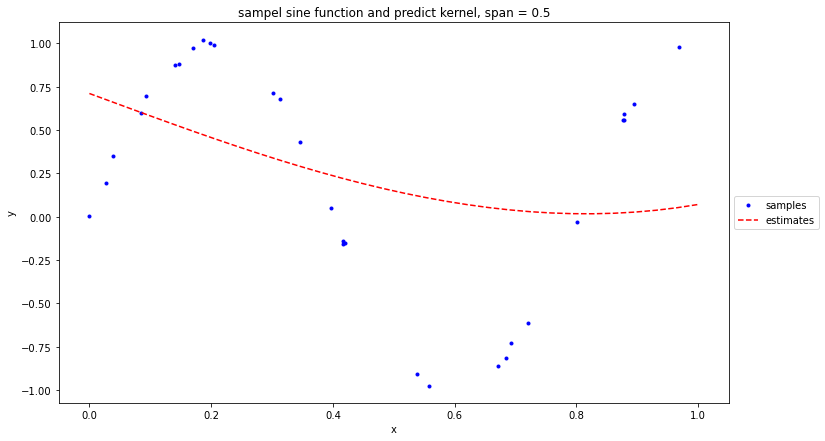

In [5]:
span = 0.5
xhat, yhat, SSE = main(x, y, span)
print('SSE',SSE)
plt.figure(figsize=(12,7))
plt.plot(x, y, 'b.', label='samples')
plt.plot(xhat, yhat, 'r--', label='estimates') # Predictions in red color.
plt.title(f'sampel sine function and predict kernel, span = {span}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

When I used h=0.5 to apply the estimate function. The yhat output on the plot looks fit worse to the y. This might be underfitting to estimate the unknown x0. so I assume the best span selection is between 0.1 to 0.5.

# 3. Tune h using LOOCV

best span 0.22
best fit residential 12.988409575594558
final_yhat [[ 0.57664892]
 [ 0.62103062]
 [ 0.6434492 ]
 [ 0.64476904]
 [ 0.62634341]
 [ 0.59003428]
 [ 0.53822065]
 [ 0.47377782]
 [ 0.40000593]
 [ 0.32049194]
 [ 0.238907  ]
 [ 0.15876807]
 [ 0.08321587]
 [ 0.01486764]
 [-0.04421661]
 [-0.09245181]
 [-0.1285647 ]
 [-0.15140464]
 [-0.15978314]
 [-0.15238099]
 [-0.12774157]
 [-0.08435039]
 [-0.02078577]
 [ 0.06408689]
 [ 0.1709134 ]
 [ 0.29968209]
 [ 0.44962345]
 [ 0.61920012]
 [ 0.80618919]
 [ 1.0078392 ]]


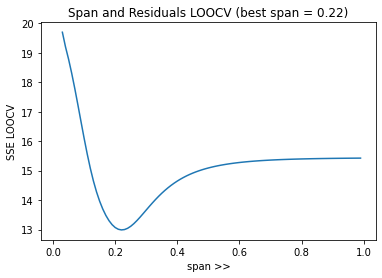

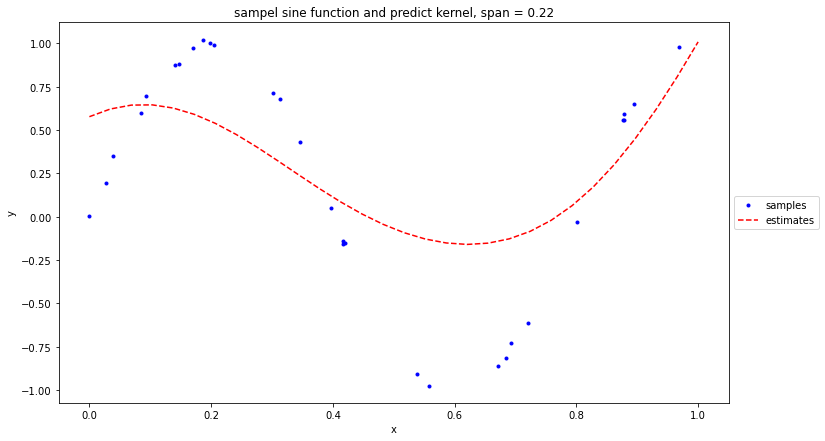

In [6]:
# apply LOOCV method to tune h
residuals = []
h_candidate = np.arange(0.01,1,0.01)
pre_residual = np.inf
for h in h_candidate:
    for i in range(len(x)):
        xtest = np.delete(x,i).reshape(-1,1)
        ytest = np.delete(y,i).reshape(-1,1)
        _, _,curr_residual = main(xtest, ytest, h)
    residuals.append(curr_residual)
    if curr_residual < pre_residual:
        pre_residual = curr_residual
        best_span = h

xhat, yhat, SSE = main(x,y,best_span)
print('best span', best_span)
print('best fit residential', pre_residual)
print('final_yhat', yhat)
plt.plot(h_candidate, residuals)  
plt.title(f'Span and Residuals LOOCV (best span = {best_span})')
plt.xlabel('span >>')
plt.ylabel('SSE LOOCV')

plt.figure(figsize=(12,7))
plt.plot(x, y, 'b.', label='samples')
plt.plot(xhat, yhat, 'r--', label='estimates') # Predictions in red color.
plt.title(f'sampel sine function and predict kernel, span = {best_span}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()    

From above plot results, when the span smaller than 0.22, it's overfitting meanwhile when the span more than 0.22, it's underfitting.

The graph below shows an example of overfitting and underfitting.

SSE 20.872674165875104


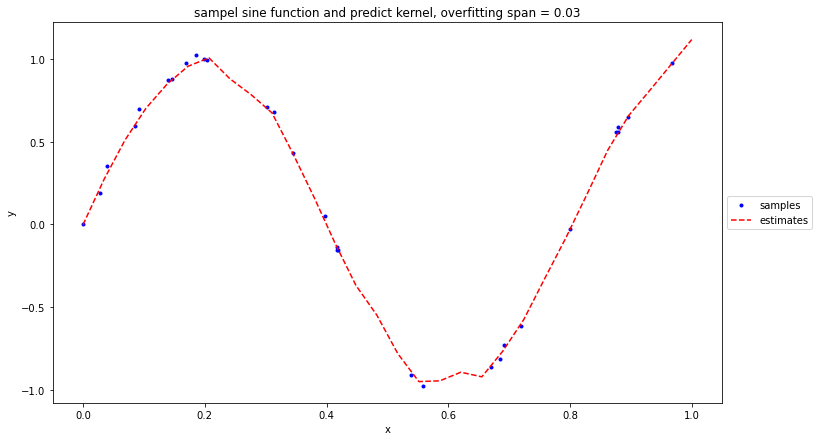

In [7]:
# overfitting example of span selecting
span = 0.03
xhat, yhat, SSE = main(x, y, span)
print('SSE',SSE)
plt.figure(figsize=(12,7))
plt.plot(x, y, 'b.', label='samples')
plt.plot(xhat, yhat, 'r--', label='estimates') # Predictions in red color.
plt.title(f'sampel sine function and predict kernel, overfitting span = {span}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 

SSE 15.03420942139092


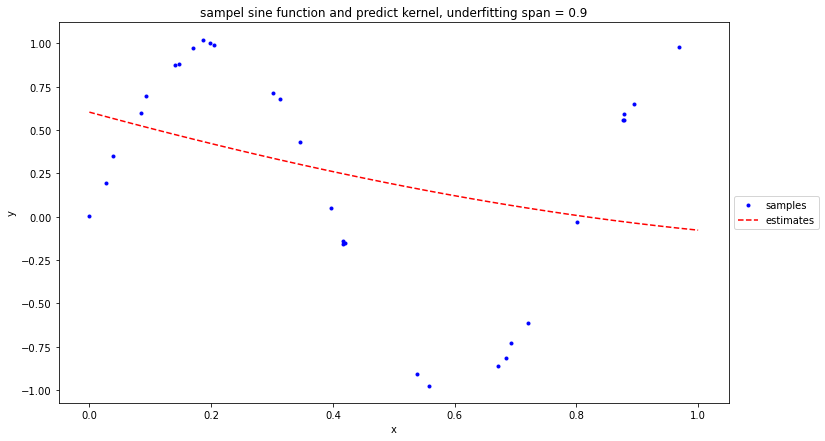

In [8]:
# overfitting example of span selecting
span = 0.9
xhat, yhat, SSE = main(x, y, span)
print('SSE',SSE)
plt.figure(figsize=(12,7))
plt.plot(x, y, 'b.', label='samples')
plt.plot(xhat, yhat, 'r--', label='estimates') # Predictions in red color.
plt.title(f'sampel sine function and predict kernel, underfitting span = {span}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show() 